# Importing Library & Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
path_dataset = "/content/CO2 Emissions_Canada.csv"
df = pd.read_csv(path_dataset)
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


# Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [ ]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [ ]:
df.shape

(7385, 12)

In [ ]:
# Renaming Columns
df.rename(columns={ 'Make': 'make',
                    'Model': 'model',
                    'Vehicle Class': 'vehicle_class',
                    'Engine Size(L)': 'engine_size',
                    'Cylinders': 'cylinders',
                    'Transmission': 'transmission',
                    'Fuel Type': 'fuel_type',
                    'Fuel Consumption City (L/100 km)': 'fuel_cons_city',
                    'Fuel Consumption Hwy (L/100 km)': 'fuel_cons_hwy',
                    'Fuel Consumption Comb (L/100 km)': 'fuel_cons_comb',
                    'Fuel Consumption Comb (mpg)': 'fuel_cons_comb_mpg',
                    'CO2 Emissions(g/km)': 'co2'}, inplace=True)

In [ ]:
df.columns

Index(['make', 'model', 'vehicle_class', 'engine_size', 'cylinders',
       'transmission', 'fuel_type', 'fuel_cons_city', 'fuel_cons_hwy',
       'fuel_cons_comb', 'fuel_cons_comb_mpg', 'co2'],
      dtype='object')

In [ ]:
# Checking Missing/NaN/Null values
df.isna().sum()

,0
make,0
model,0
vehicle_class,0
engine_size,0
cylinders,0
transmission,0
fuel_type,0
fuel_cons_city,0
fuel_cons_hwy,0
fuel_cons_comb,0


In [ ]:
# Checking Duplicates
df.duplicated().sum()

1103

In [ ]:
# Drop duplicated data
df.drop_duplicates(inplace=True)

## Univariate (Distributions of Features)

Text(0.5, 1.0, 'Make')

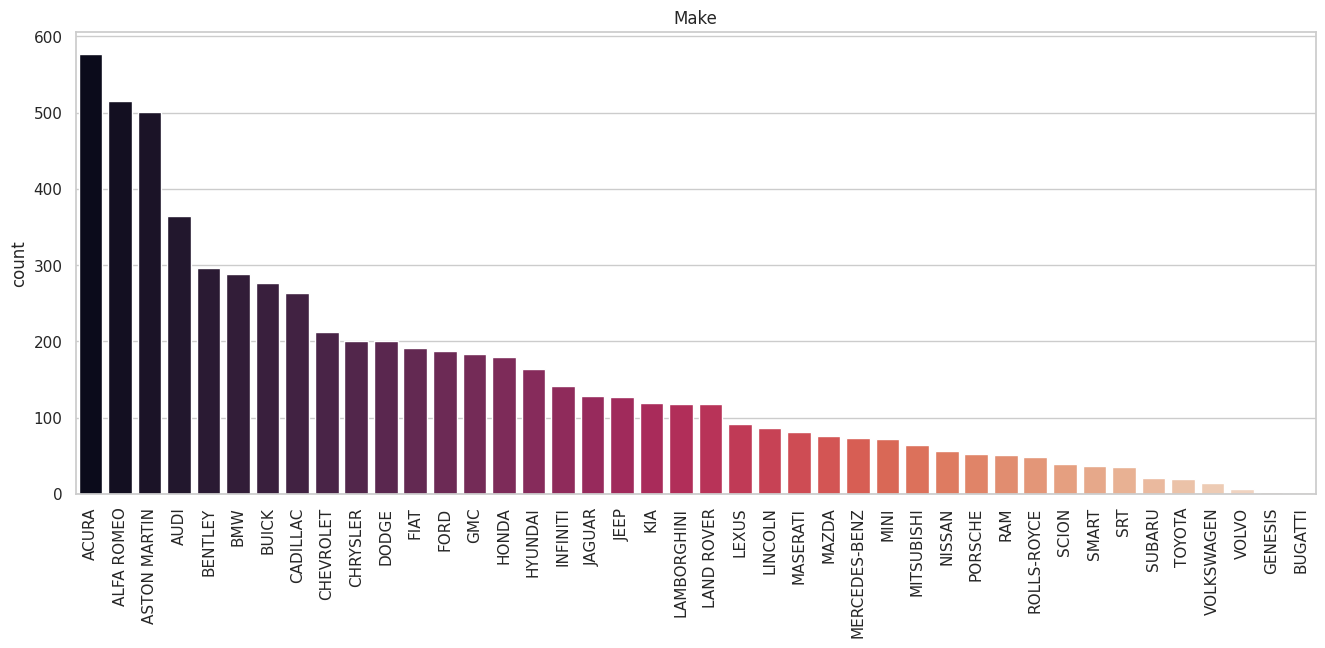

In [ ]:
x = df['make'].unique()
y = df['make'].value_counts()

plt.figure(figsize=(16,6))
sns.barplot(x=x, y=y, palette="rocket", hue=x)
plt.xticks(rotation=90)
plt.title("Make")

Text(0.5, 1.0, 'Fuel type')

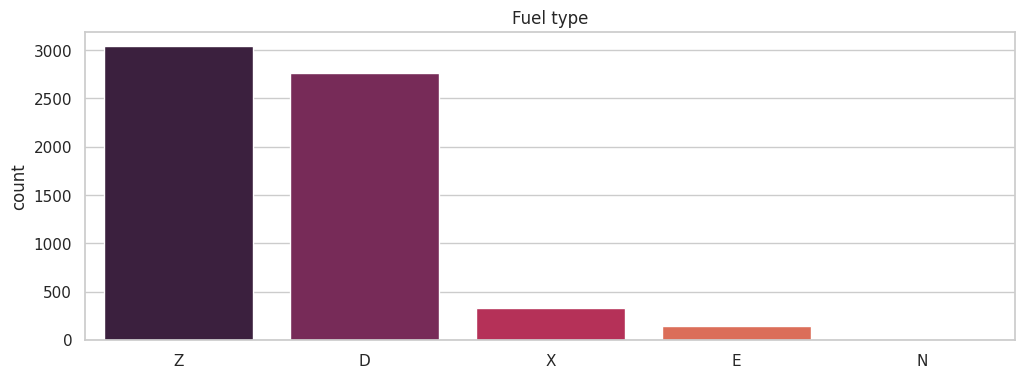

In [ ]:
x = df['fuel_type'].unique()
y = df['fuel_type'].value_counts()

plt.figure(figsize=(12,4))
sns.barplot(x=x, y=y, palette="rocket", hue=x)
plt.title("Fuel type")

<ipython-input-436-f4b57cdce916>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='vehicle_class', palette='rocket')


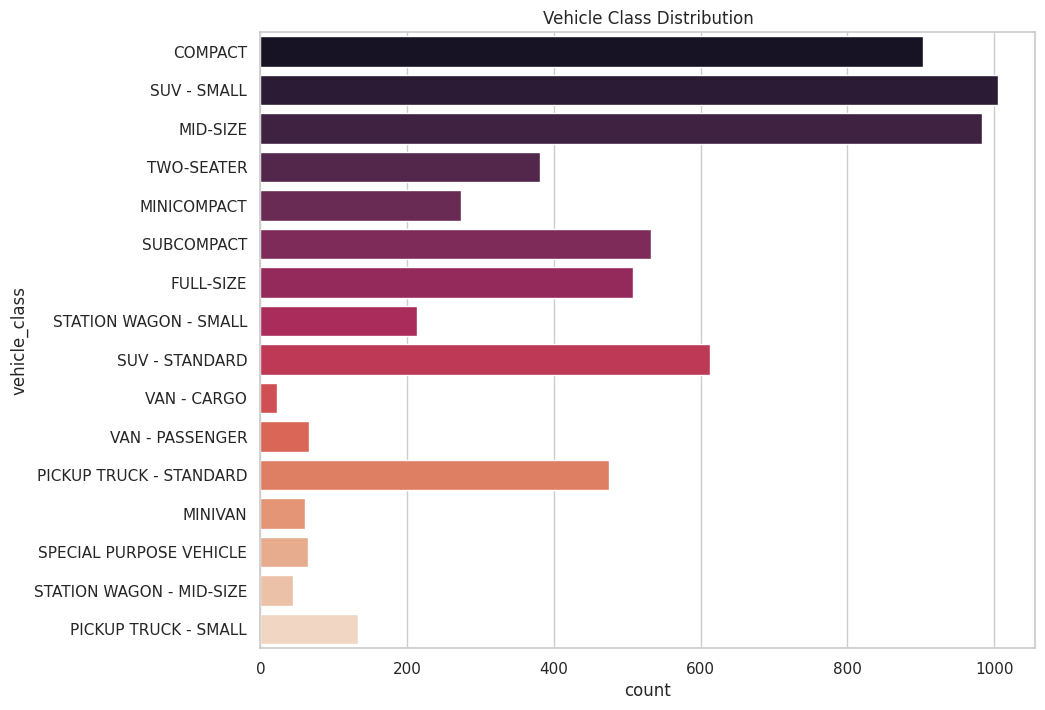

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df, y='vehicle_class', palette='rocket')
plt.title('Vehicle Class Distribution')
plt.show()

Text(0.5, 1.0, 'Fuel type')

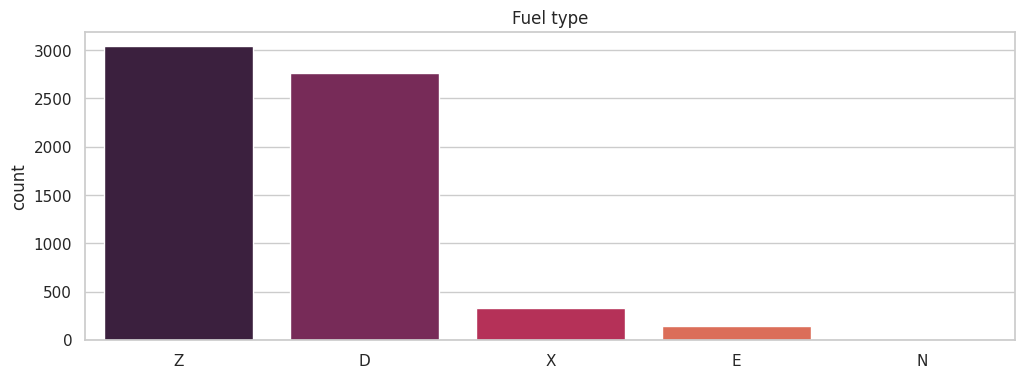

In [ ]:
x = df['fuel_type'].unique()
y = df['fuel_type'].value_counts()

plt.figure(figsize=(12,4))
sns.barplot(x=x, y=y, palette="rocket", hue=x)
plt.title("Fuel type")

<ipython-input-438-b2bf79be33e5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='transmission', palette='rocket')


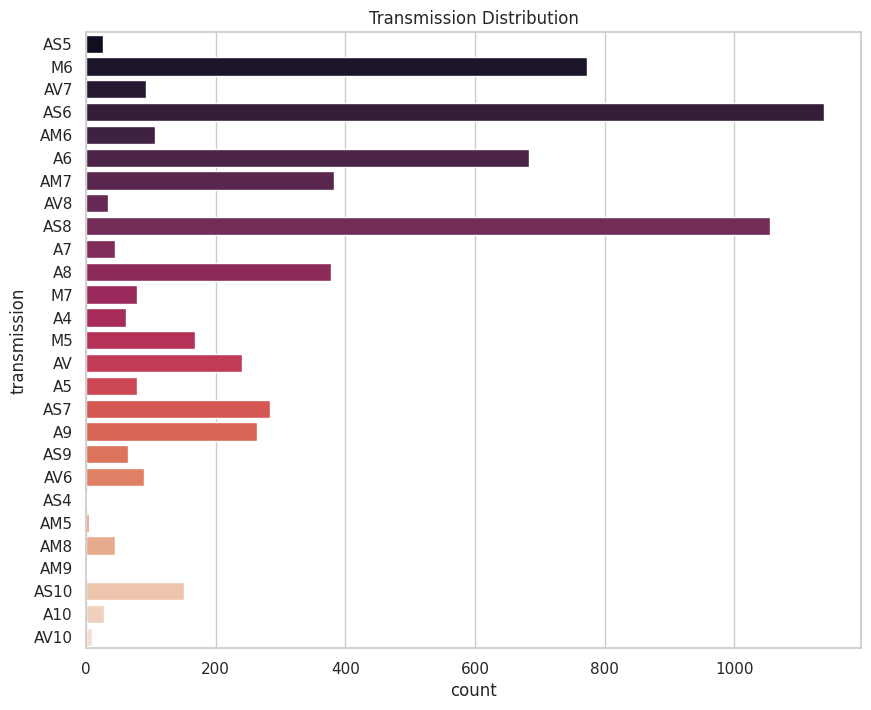

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df, y='transmission', palette='rocket')
plt.title('Transmission Distribution')
plt.show()

Text(0.5, 1.0, 'engine Size')

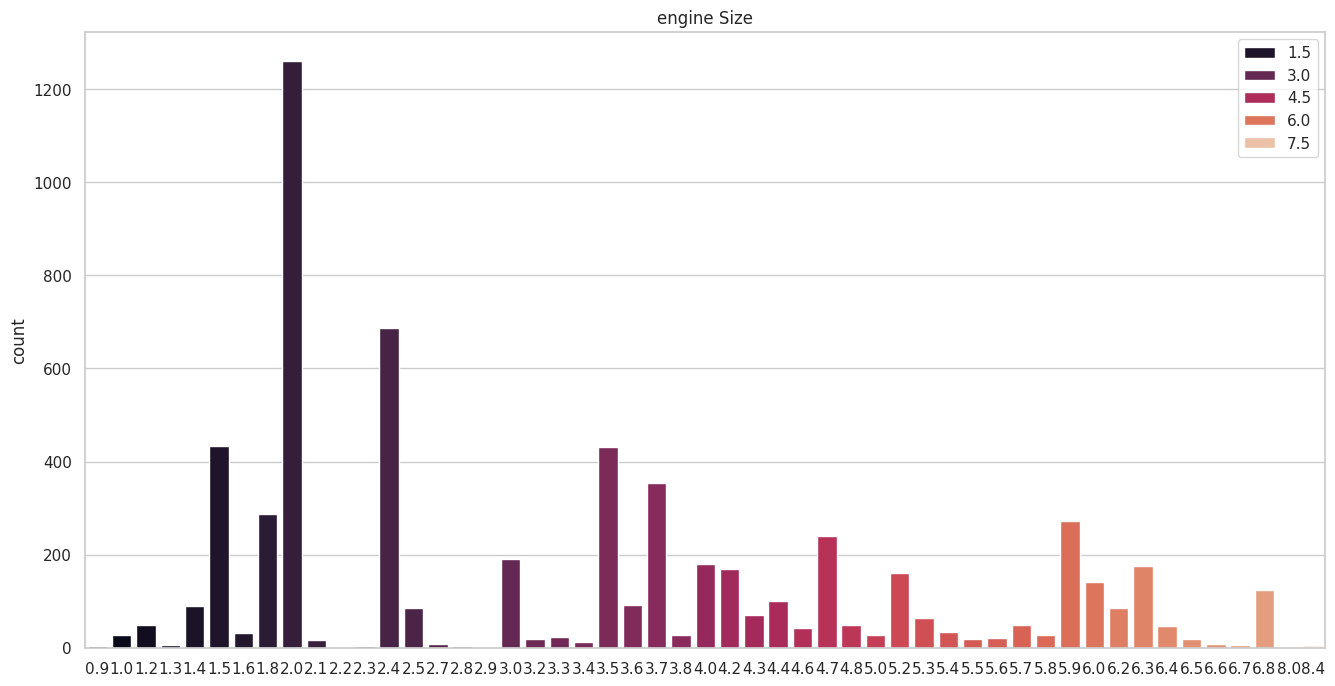

In [ ]:
x = df['engine_size'].unique()
y = df['engine_size'].value_counts()

plt.figure(figsize=(16,8))
sns.barplot(x=x, y=y, palette="rocket", hue=x)
plt.title("engine Size")

Text(0.5, 1.0, 'Cylinders Distribution')

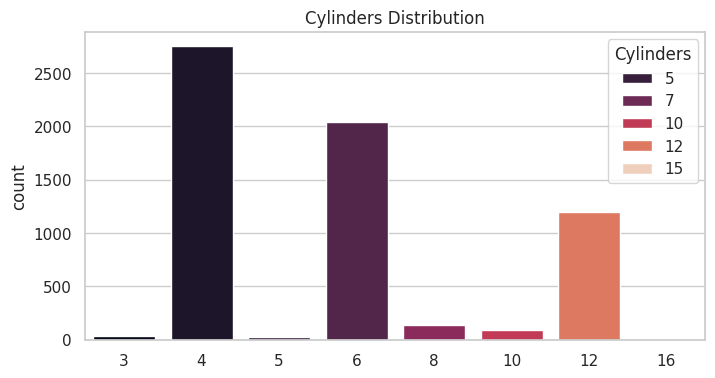

In [ ]:
x = df['cylinders'].unique()
y = df['cylinders'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(x=x, y=y, palette="rocket", hue=x, legend=True)
plt.legend(title="Cylinders")
plt.title("Cylinders Distribution")

**CONCLUSION**

We can conclude that, from all the categorical features,

1. The use of fuels of diesel (D), ethanol (E), and natural gas (N) fuel in cars are very small compared to regular gas (X) and premium gas (Z)
2. Widespread use of AS6, AS8, M6, A6, A9 as transmission options
3. 4, 6, 8 sizes are the most used cylinders
4. Engine Size with 2.0 and 3.0 are the most common
5. Data is dominated by small vehicles (SUV-SMALL, MID-SIZE)

### Distribution of numerical values

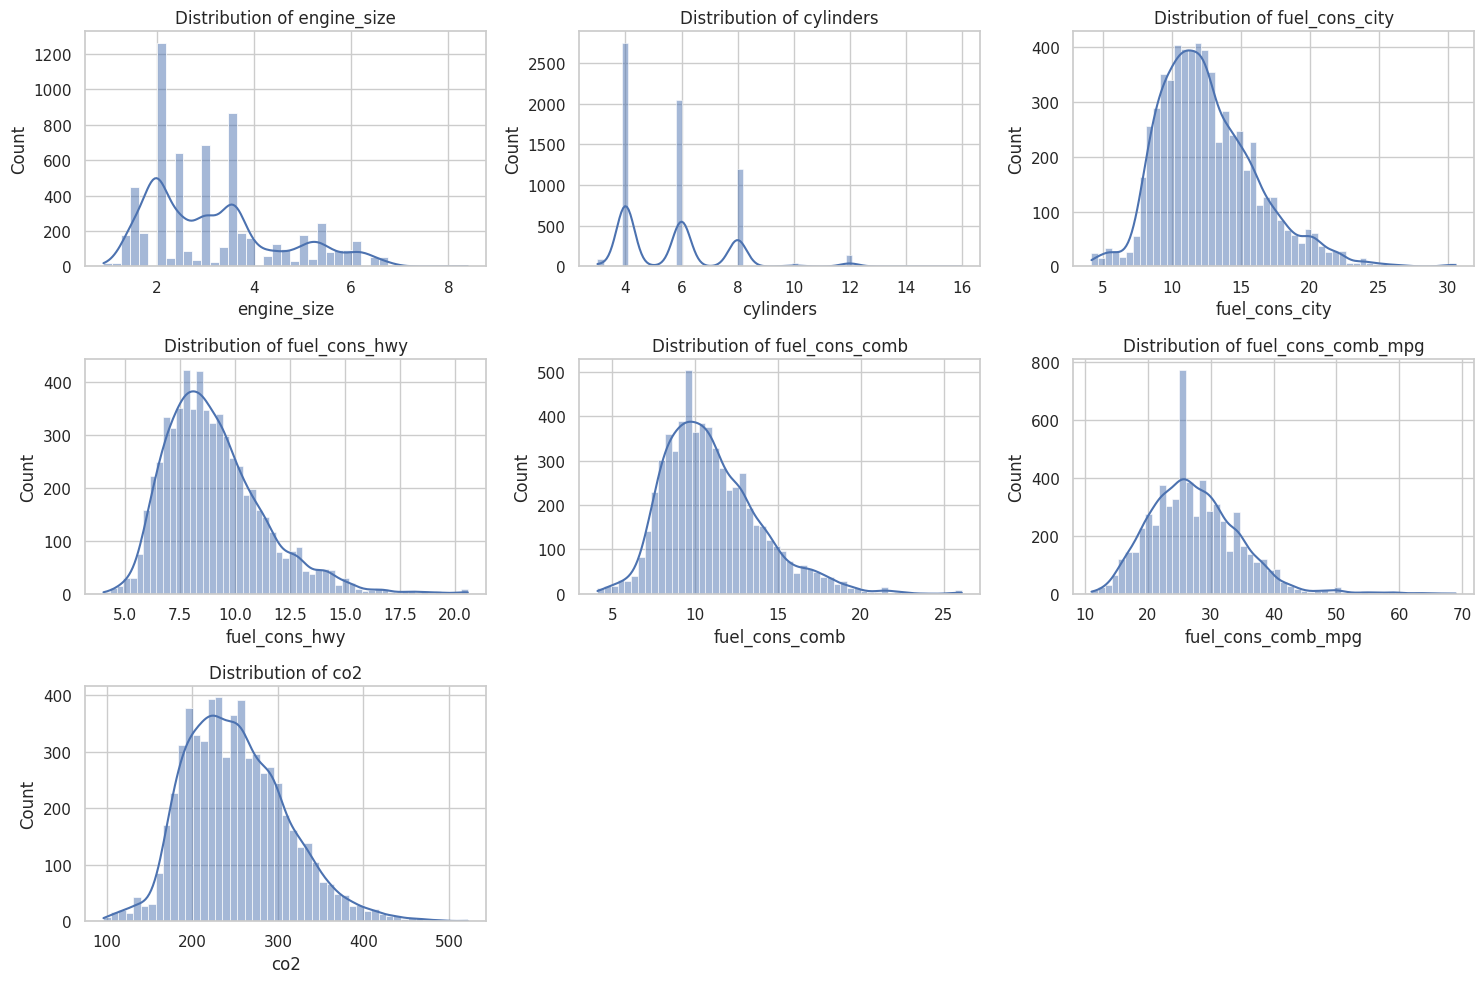

In [ ]:
numerical_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(15, 10))

num_vars = len(numerical_df.columns)

for i, var in enumerate(numerical_df.columns, 1):
    plt.subplot((num_vars // 3) + 1, 3, i)
    sns.histplot(data=df, x=var, kde=True)
    plt.title(f'Distribution of {var}')

plt.tight_layout()
plt.show()

### Distribution of CO2 Emissions in Canada

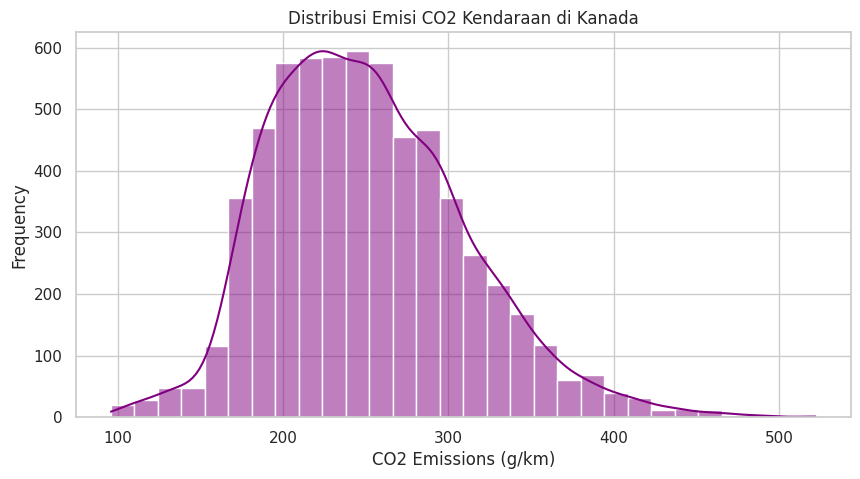

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 5))
sns.histplot(df["co2"], bins=30, kde=True, color="purple")
plt.xlabel("CO2 Emissions (g/km)")
plt.ylabel("Frequency")
plt.title("Distribusi Emisi CO2 Kendaraan di Kanada")
plt.show()

### Distributions of Fuel Consumption by City

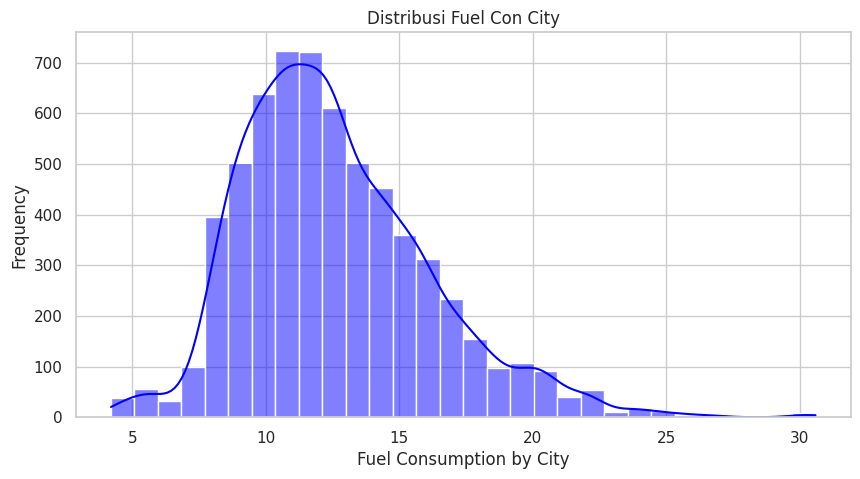

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 5))
sns.histplot(df["fuel_cons_city"], bins=30, kde=True, color="blue")
plt.xlabel("Fuel Consumption by City")
plt.ylabel("Frequency")
plt.title("Distribusi Fuel Con City")
plt.show()

### Distributioin of Fuel Consumption by Highway

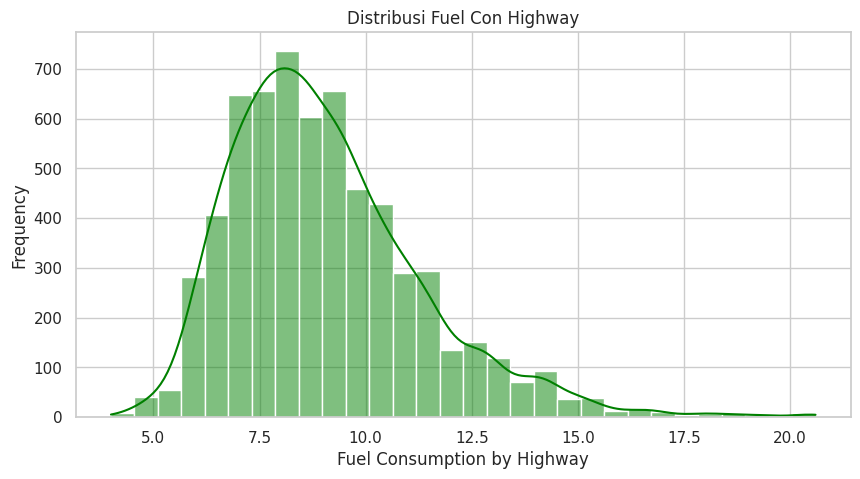

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 5))
sns.histplot(df["fuel_cons_hwy"], bins=30, kde=True, color="green")
plt.xlabel("Fuel Consumption by Highway")
plt.ylabel("Frequency")
plt.title("Distribusi Fuel Con Highway")
plt.show()

### Distribution of Fuel Consumption by Comb

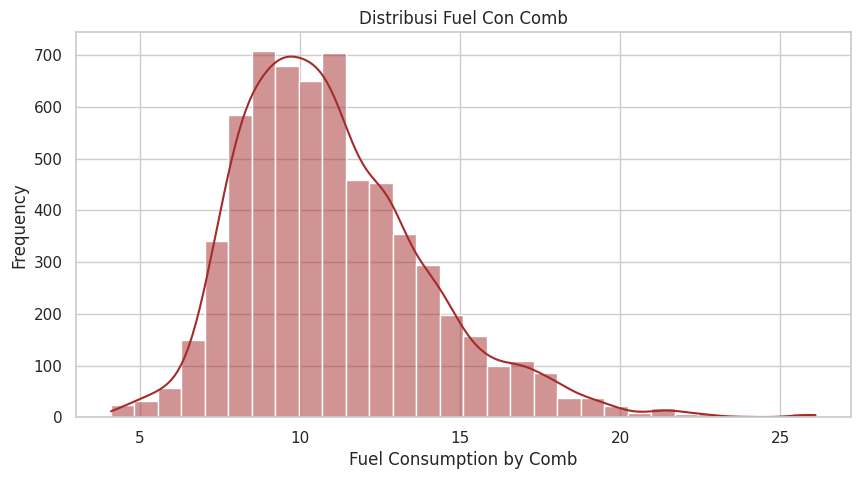

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 5))
sns.histplot(df["fuel_cons_comb"], bins=30, kde=True, color="brown")
plt.xlabel("Fuel Consumption by Comb")
plt.ylabel("Frequency")
plt.title("Distribusi Fuel Con Comb")
plt.show()

### Distribution of MPG Fuel Consumption by Comb

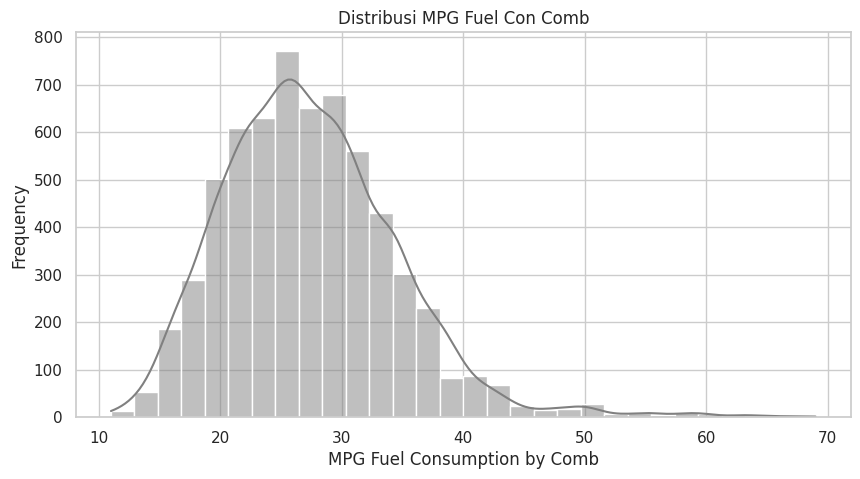

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 5))
sns.histplot(df["fuel_cons_comb_mpg"], bins=30, kde=True, color="grey")
plt.xlabel("MPG Fuel Consumption by Comb")
plt.ylabel("Frequency")
plt.title("Distribusi MPG Fuel Con Comb")
plt.show()

In [ ]:
df['fuel_cons_hwy'].mean()

9.070582617000953

In [ ]:
df['fuel_cons_comb'].mean()

11.017876472461

In [ ]:
df.shape

(6282, 12)

## **Bivariate (Coorelation between Numerical values)**

Text(0.5, 1.05, 'Feature Correlation')

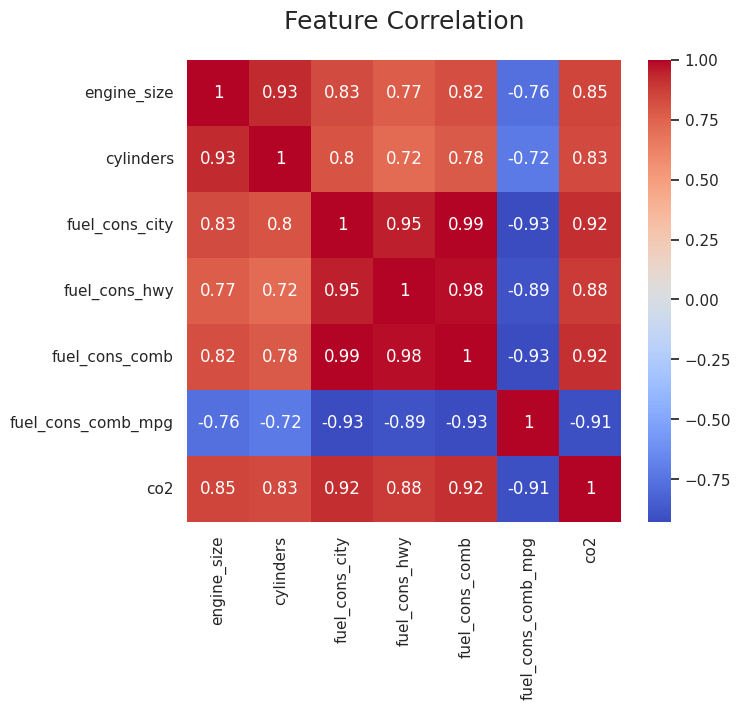

In [ ]:
plt.figure(figsize=(7,6))
num_feature = df.select_dtypes(include=['number'])
sns.heatmap(num_feature.corr(), annot=True, cmap="coolwarm")
plt.title('Feature Correlation', fontsize=18, y=1.05)

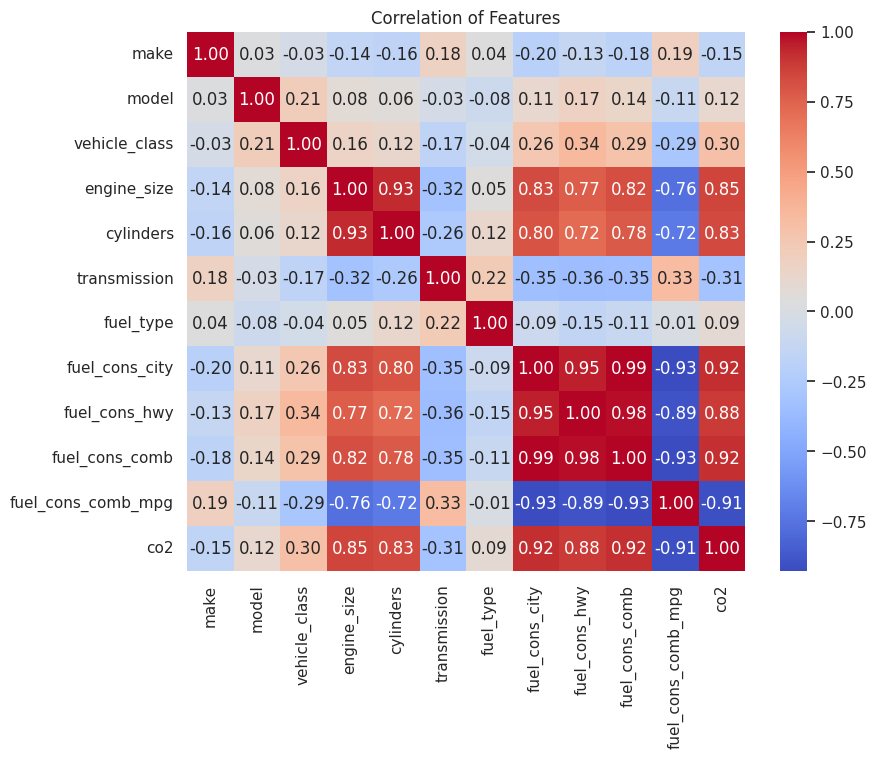

In [ ]:
# Label Encoding
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include=['object']):
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

plt.figure(figsize=(9, 7))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation of Features')
plt.show()

### **Which Make emits the most CO2?**

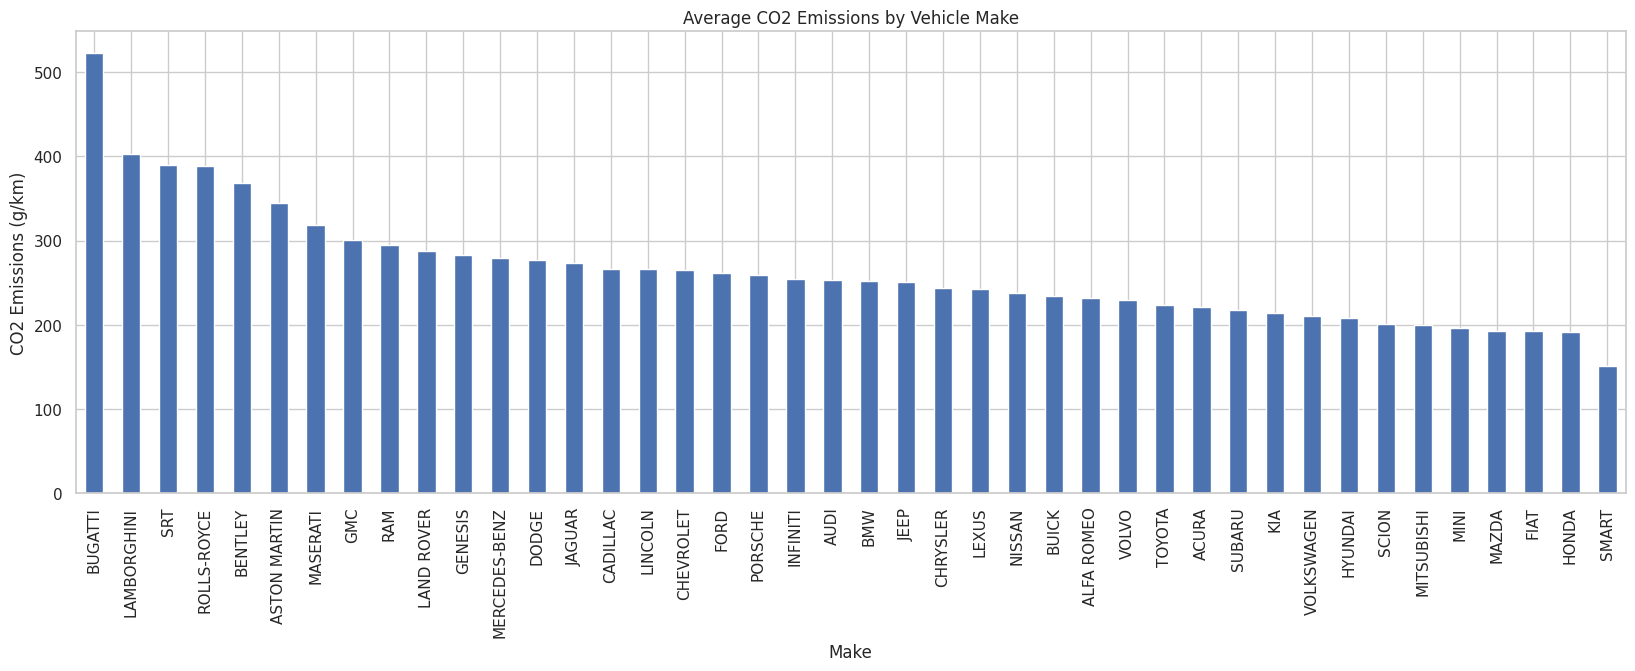

In [ ]:
avg_co2_by_brands = df.groupby("make")["co2"].mean().sort_values(ascending=False)

plt.figure(figsize=(20,6))
avg_co2_by_brands.plot(kind="bar")
plt.title("Average CO2 Emissions by Vehicle Make")
plt.xlabel("Make")
plt.ylabel("CO2 Emissions (g/km)")
plt.show()

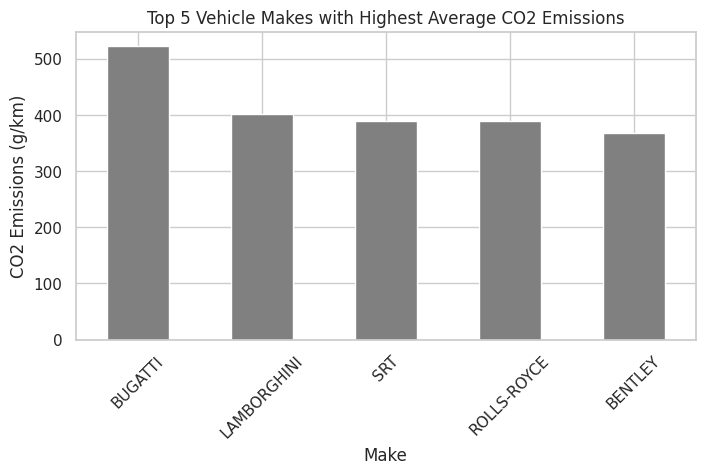

In [ ]:
avg_co2_by_brands = df.groupby("make")["co2"].mean().sort_values(ascending=False).head(5)

plt.figure(figsize=(8, 4))
avg_co2_by_brands.plot(kind="bar", color="grey")
plt.title("Top 5 Vehicle Makes with Highest Average CO2 Emissions")
plt.xlabel("Make")
plt.ylabel("CO2 Emissions (g/km)")
plt.xticks(rotation=45)
plt.show()

### Which Engine size emits the most CO2?

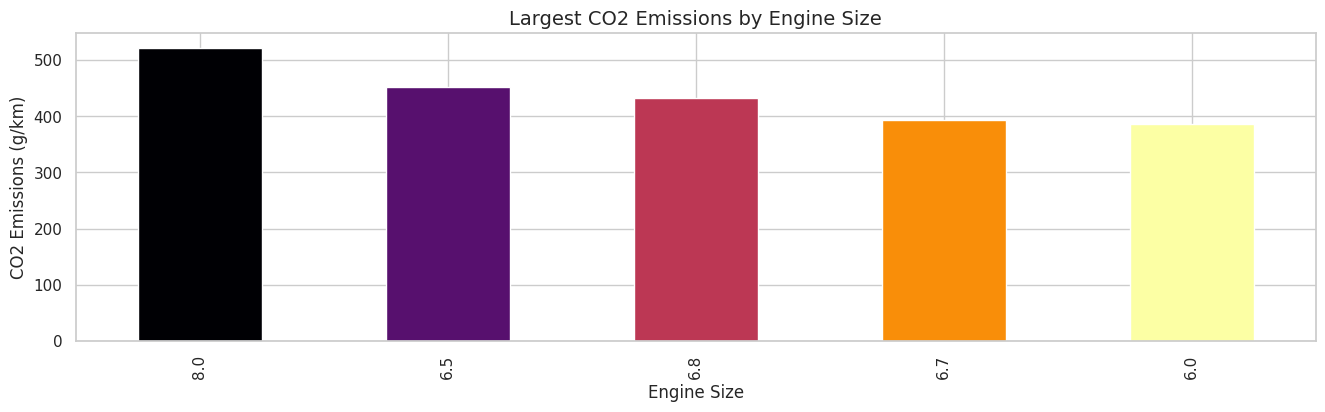

In [ ]:
avg_co2_by_engine = df.groupby("engine_size")["co2"].mean().sort_values(ascending=False)
top_avg_co2_by_engine = avg_co2_by_engine.nlargest(5)

plt.figure(figsize=(16, 4))
colors = plt.cm.inferno(np.linspace(0, 1, len(top_avg_co2_by_engine)))
top_avg_co2_by_engine.plot(kind="bar", color=colors)

plt.title("Largest CO2 Emissions by Engine Size", fontsize=14)
plt.xlabel("Engine Size", fontsize=12)
plt.ylabel("CO2 Emissions (g/km)", fontsize=12)

plt.show()

### Which Fuel Type emits the most CO2?

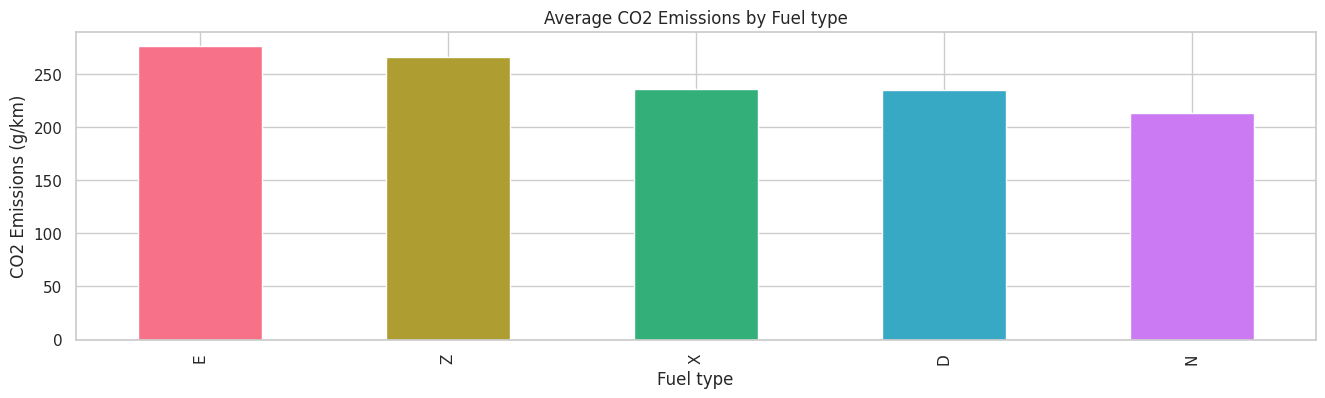

In [ ]:
avg_co2_by_engine = df.groupby("fuel_type")["co2"].mean().sort_values(ascending=False)
fuel_types = avg_co2_by_engine.index
colors = sns.color_palette("husl", len(fuel_types))

plt.figure(figsize=(16,4))
avg_co2_by_engine.plot(kind="bar", color=colors)
plt.title("Average CO2 Emissions by Fuel type")
plt.xlabel("Fuel type")
plt.ylabel("CO2 Emissions (g/km)")
plt.show()

### Which Vehicle class emits the most CO2?

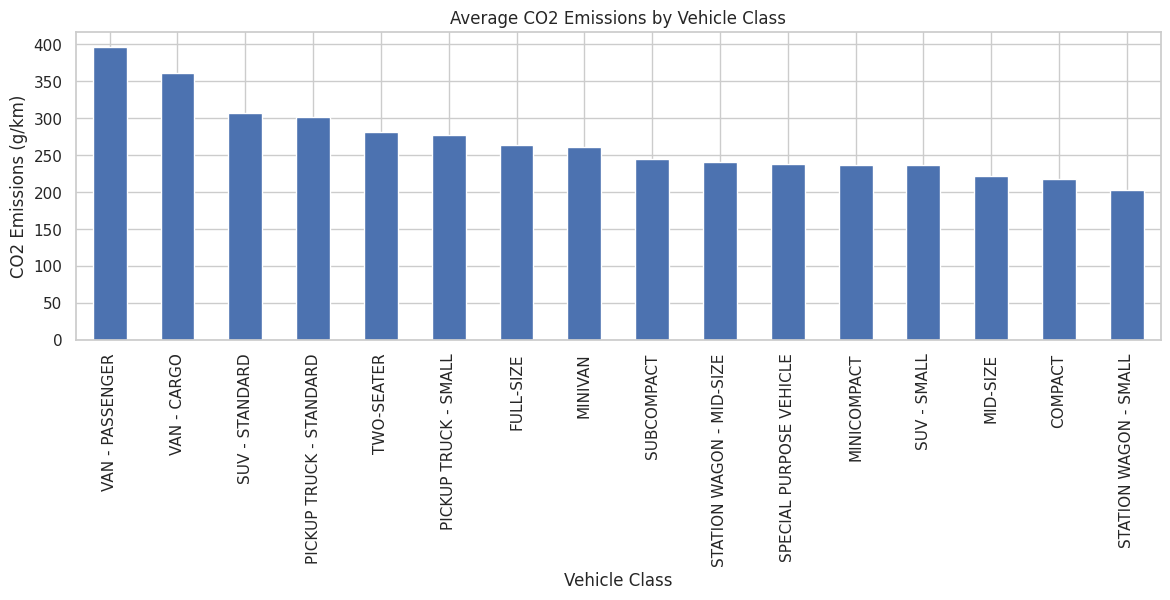

In [ ]:
avg_co2_by_class = df.groupby("vehicle_class")["co2"].mean().sort_values(ascending=False)

plt.figure(figsize=(14,4))
avg_co2_by_class.plot(kind="bar")
plt.title("Average CO2 Emissions by Vehicle Class")
plt.xlabel("Vehicle Class")
plt.ylabel("CO2 Emissions (g/km)")
plt.show()

### Fuel Consumption by City vs CO2

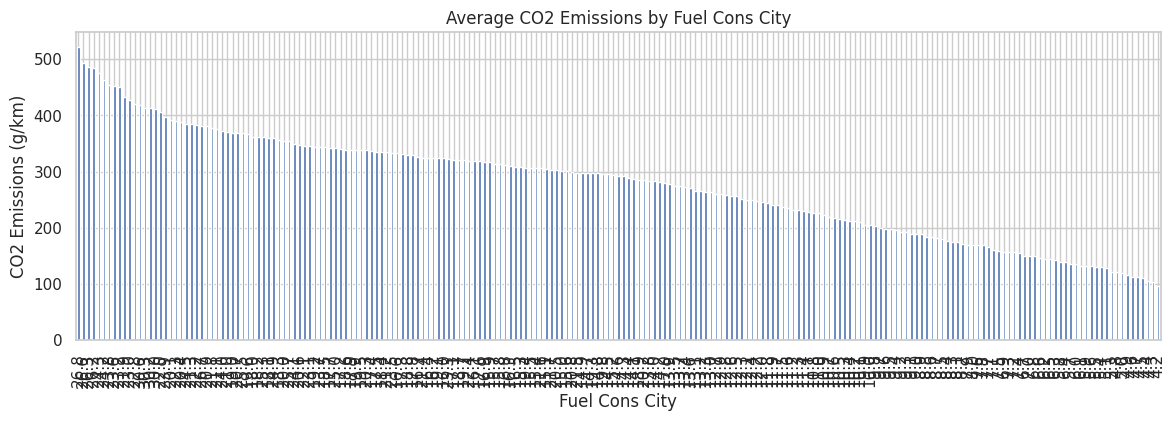

In [ ]:
avg_co2_by_class = df.groupby("fuel_cons_city")["co2"].mean().sort_values(ascending=False)

plt.figure(figsize=(14,4))
avg_co2_by_class.plot(kind="bar")
plt.title("Average CO2 Emissions by Fuel Cons City")
plt.xlabel("Fuel Cons City")
plt.ylabel("CO2 Emissions (g/km)")
plt.show()

###Fuel Consumption by Highway

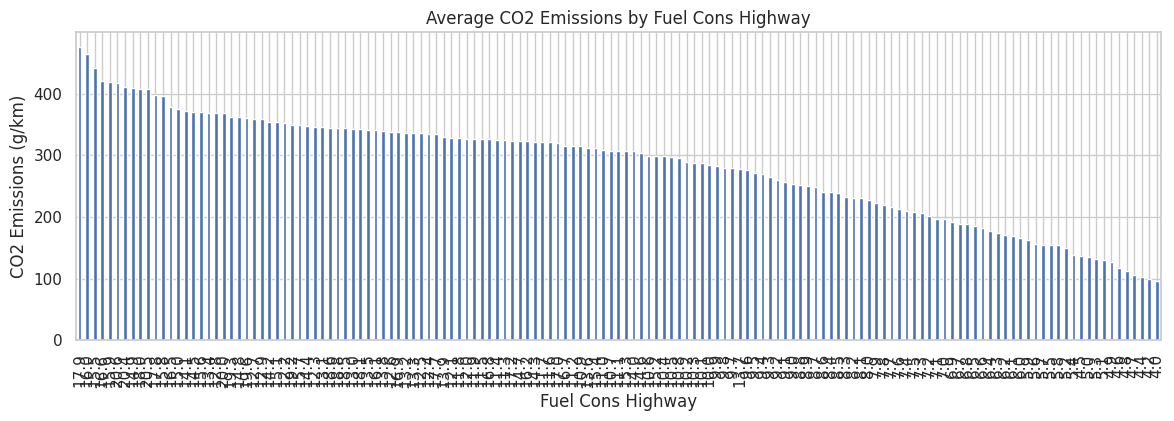

In [ ]:
avg_co2_by_class = df.groupby("fuel_cons_hwy")["co2"].mean().sort_values(ascending=False)

plt.figure(figsize=(14,4))
avg_co2_by_class.plot(kind="bar")
plt.title("Average CO2 Emissions by Fuel Cons Highway")
plt.xlabel("Fuel Cons Highway")
plt.ylabel("CO2 Emissions (g/km)")
plt.show()

### Fuel Consumption by Comb

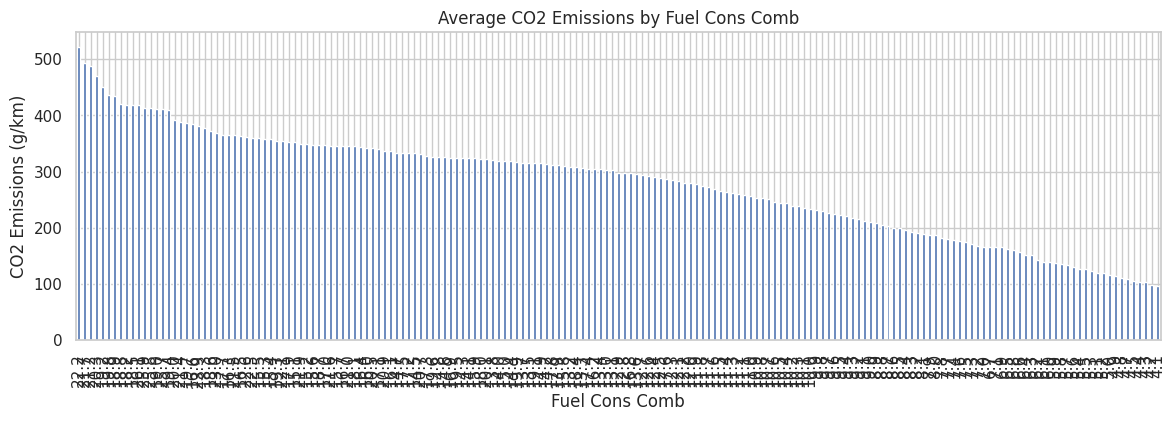

In [ ]:
avg_co2_by_class = df.groupby("fuel_cons_comb")["co2"].mean().sort_values(ascending=False)

plt.figure(figsize=(14,4))
avg_co2_by_class.plot(kind="bar")
plt.title("Average CO2 Emissions by Fuel Cons Comb")
plt.xlabel("Fuel Cons Comb")
plt.ylabel("CO2 Emissions (g/km)")
plt.show()

### MPG Fuel Consumption by Comb

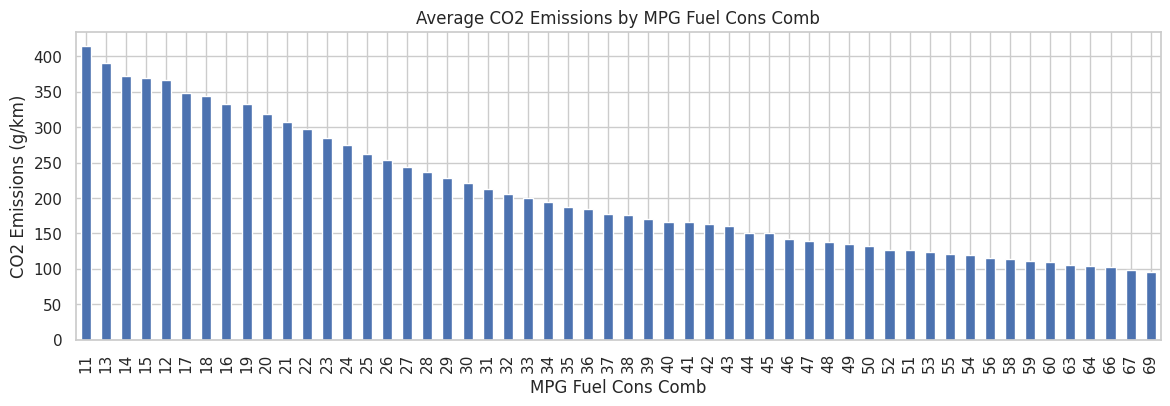

In [ ]:
avg_co2_by_class = df.groupby("fuel_cons_comb_mpg")["co2"].mean().sort_values(ascending=False)

plt.figure(figsize=(14,4))
avg_co2_by_class.plot(kind="bar")
plt.title("Average CO2 Emissions by MPG Fuel Cons Comb")
plt.xlabel("MPG Fuel Cons Comb")
plt.ylabel("CO2 Emissions (g/km)")
plt.show()

### Scatter Plot dari Fuel Consumption antara di Kota, Jalan raya, dan Combination, serta Konsumsi Bahan Bakar

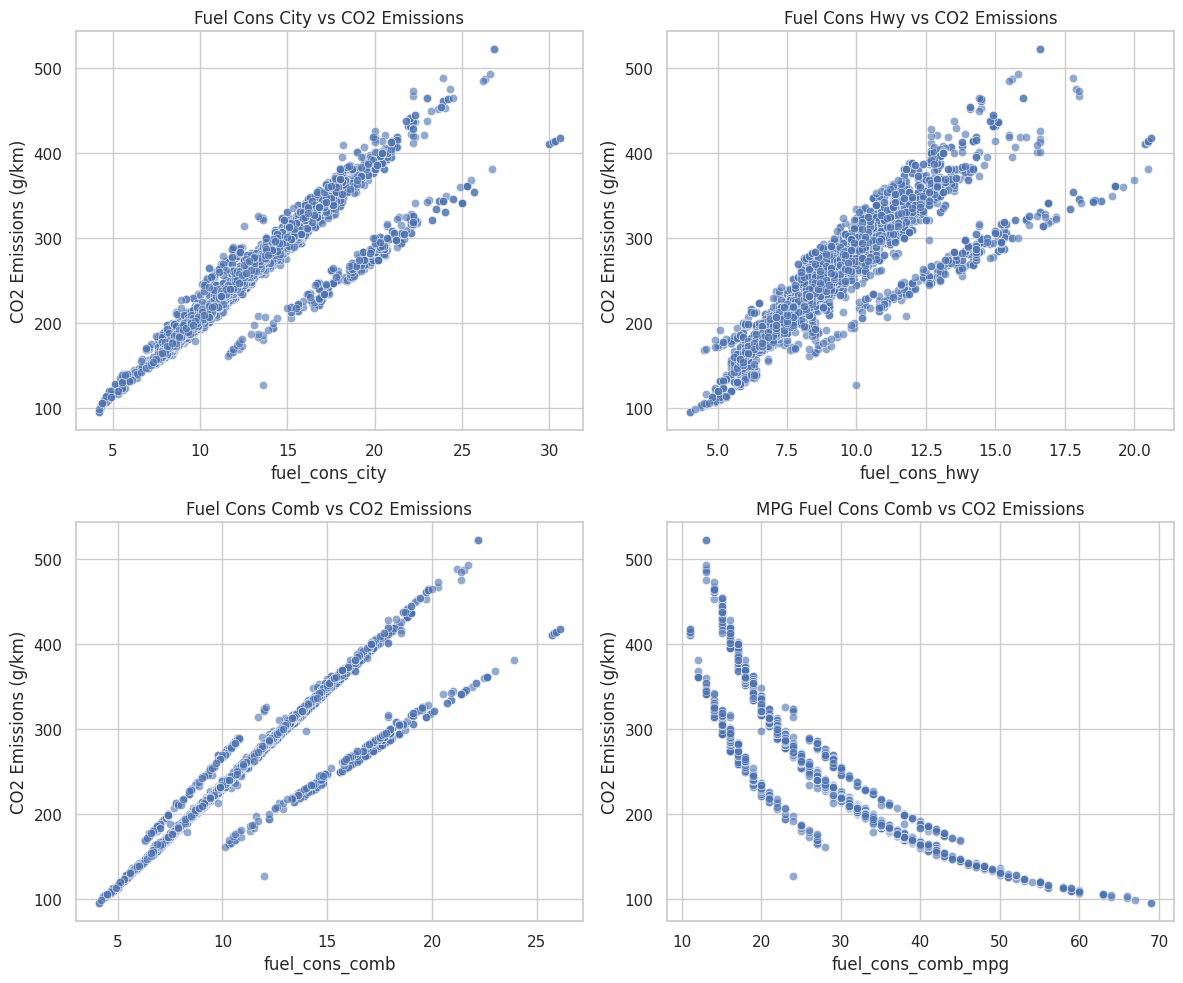

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

features = ['fuel_cons_city', 'fuel_cons_hwy', 'fuel_cons_comb', 'fuel_cons_comb_mpg']
titles = ["Fuel Cons City vs CO2 Emissions",
          "Fuel Cons Hwy vs CO2 Emissions",
          "Fuel Cons Comb vs CO2 Emissions",
          "MPG Fuel Cons Comb vs CO2 Emissions"]

for ax, feature, title in zip(axes.flatten(), features, titles):
    sns.scatterplot(data=df, x=feature, y='co2', alpha=0.6, ax=ax)
    ax.set_xlabel(feature)
    ax.set_ylabel("CO2 Emissions (g/km)")
    ax.set_title(title)
    ax.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
df['fuel_cons_city'].mean()

12.610219675262654

## Perbandingan Rata-rata CO2 Emission dengan Categorical Features

In [ ]:
from itertools import combinations
import scipy.stats as stats

categorical_columns = ['make', 'model', 'transmission', 'vehicle_class']
target = "co2"

for col in categorical_columns:
    df[col] = df[col].astype("category").cat.codes

results = {}
for col in categorical_columns:
    contingency_table = pd.crosstab(df[col], df[target])
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    results[col] = {"Chi2": chi2, "p-value": p}

results_df = pd.DataFrame(results)
print(results_df)

                 make          model  transmission  vehicle_class
Chi2     40510.154548  789115.483584  19063.497276   14210.388738
p-value      0.000000       0.000000      0.000000       0.000000


In [ ]:
import pandas as pd
import scipy.stats as stats

# Daftar fitur kategorikal
categorical_columns = ['make', 'model', 'transmission', 'vehicle_class']
target = "co2"

# Diskritisasi target numerik menjadi kategori (misalnya, berdasarkan kuantil)
df["co2_category"] = pd.qcut(df["co2"], q=4, labels=["Low", "Medium", "High", "Very High"])

# Menyimpan hasil Chi-Square Test
results = {}

for col in categorical_columns:
    contingency_table = pd.crosstab(df[col], df["co2_category"])  # Gunakan kategori, bukan angka
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    results[col] = {"Chi2": chi2, "p-value": p}

# Konversi hasil ke DataFrame
results_df = pd.DataFrame(results)
print(results_df)


                make         model  transmission  vehicle_class
Chi2     3232.358012  14539.593137   2319.235844     3248.48272
p-value     0.000000      0.000000      0.000000        0.00000


# Preprocessing

## Grouping

## Finding Outliers

### Using IQR

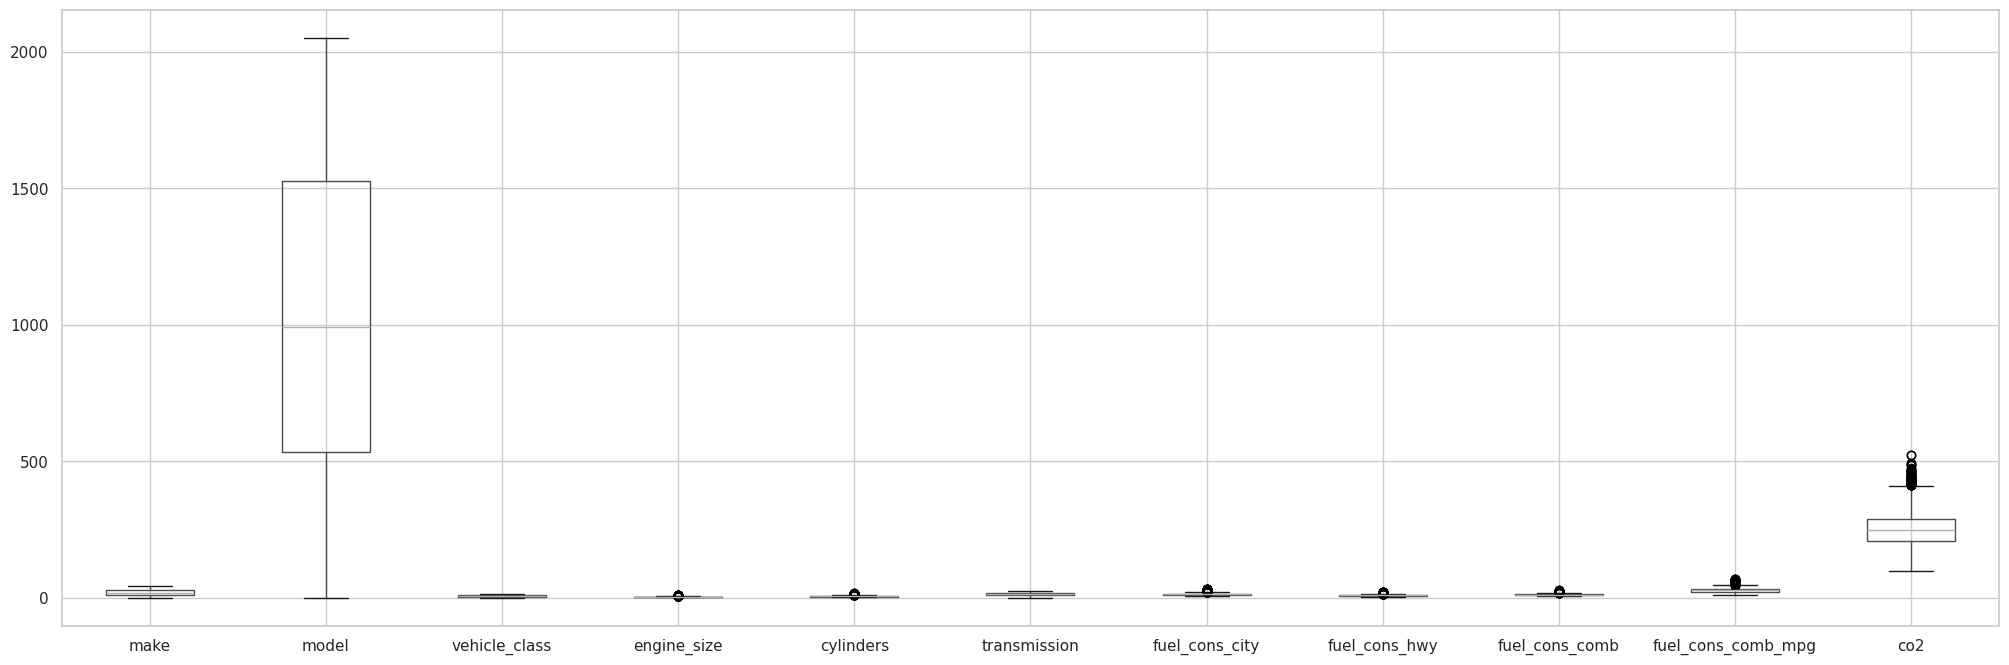

In [ ]:
plt.figure(figsize=(25,8))
df.boxplot()
plt.show()

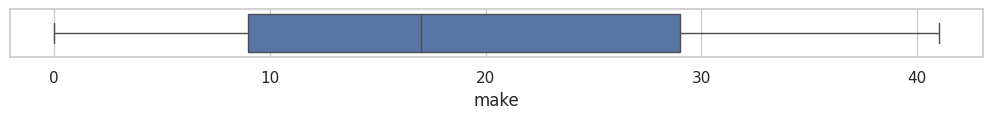

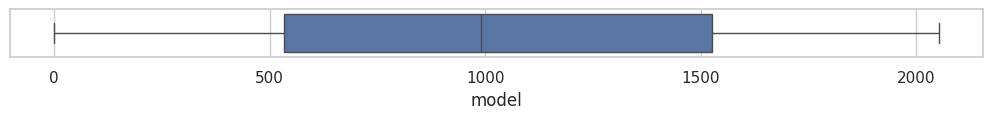

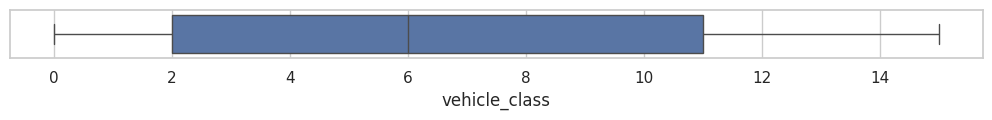

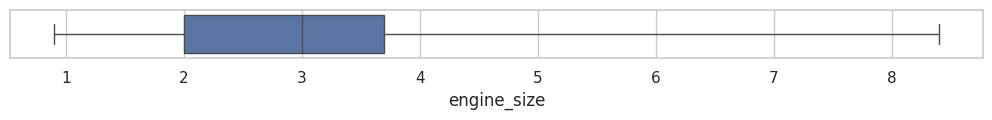

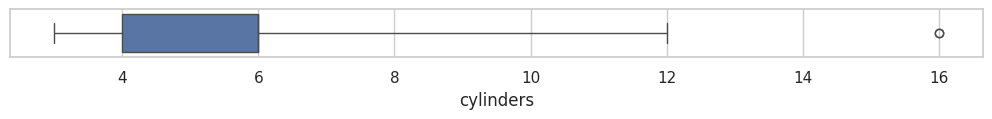

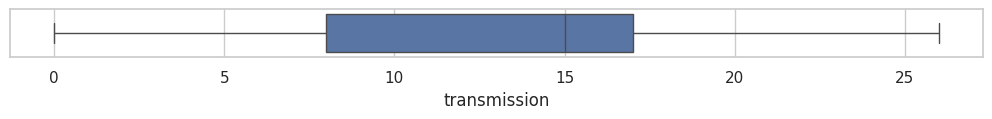

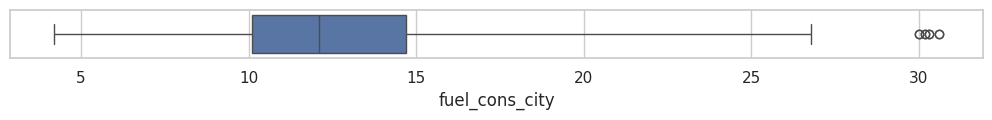

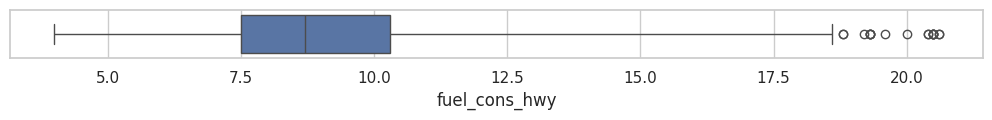

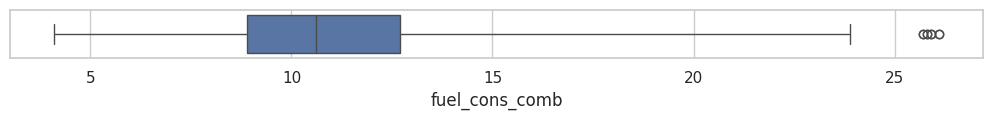

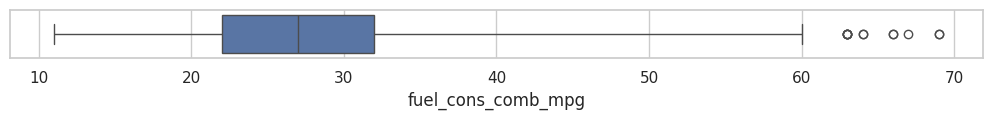

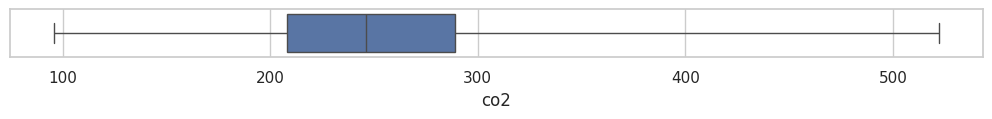

In [ ]:
index=0

for feature in df.select_dtypes('number').columns:
    index+=1
    plt.figure(figsize=(20,15))
    plt.subplot((len(df.columns)),2,index)
    sns.boxplot(x=feature,data=df,whis=3)

    plt.tight_layout()

    plt.show()

#### Outlier Fuel Consumption City

####  Outlier Cylinders

In [ ]:
Q1 = df['cylinders'].quantile(0.25)
Q3 = df['cylinders'].quantile(0.75)

(Q1,Q3)

(4.0, 6.0)

In [ ]:
IQR = Q3-Q1
IQR

2.0

In [ ]:
batas_bawah = Q1-1.5*IQR
batas_atas = Q3+1.5*IQR
(batas_bawah, batas_atas)

(1.0, 9.0)

In [ ]:
# outlier dari cylinders

df[ (df['cylinders']< batas_bawah) | (df['cylinders']> batas_atas) ]

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,fuel_cons_comb_mpg,co2,co2_category
13,2,708,3,5.9,12,3,Z,18.0,12.6,15.6,18,359,Very High
14,2,1484,10,5.9,12,3,Z,18.0,12.6,15.6,18,359,Very High
19,2,1872,3,5.9,12,3,Z,18.0,12.6,15.6,18,359,Very High
36,3,257,1,6.3,12,17,Z,18.7,11.5,15.5,18,363,Very High
47,3,1458,13,5.2,10,4,Z,18.2,10.6,14.8,19,347,Very High
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7286,34,699,8,6.7,12,17,Z,20.1,12.1,16.5,17,386,Very High
7287,34,716,0,6.6,12,17,Z,20.4,13.1,17.1,17,400,Very High
7288,34,1014,1,6.6,12,17,Z,20.4,13.1,17.1,17,400,Very High
7289,34,1015,1,6.6,12,17,Z,20.4,13.1,17.1,17,400,Very High


####  Outlier Engine Size

In [ ]:
Q1 = df['engine_size'].quantile(0.25)
Q3 = df['engine_size'].quantile(0.75)
Q1,Q3

(2.0, 3.7)

In [ ]:
IQR = Q3-Q1
IQR

1.7000000000000002

In [ ]:
batas_bawah = Q1-1.5*IQR
batas_atas = Q3+1.5*IQR

(batas_bawah, batas_atas)

(-0.5500000000000003, 6.25)

In [ ]:
# outlier dari engine_size

df[ (df['engine_size']<batas_bawah) | (df['engine_size']>batas_atas) ]

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,fuel_cons_comb_mpg,co2,co2_category
36,3,257,1,6.3,12,17,Z,18.7,11.5,15.5,18,363,Very High
75,4,1261,2,6.8,8,17,Z,22.3,14.9,19.0,15,437,Very High
290,10,53,1,6.4,8,2,Z,16.7,10.3,13.8,20,317,Very High
300,11,472,2,6.4,8,25,Z,16.8,10.4,13.9,20,320,Very High
301,11,473,2,6.4,8,2,Z,16.7,10.3,13.8,20,317,Very High
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7286,34,699,8,6.7,12,17,Z,20.1,12.1,16.5,17,386,Very High
7287,34,716,0,6.6,12,17,Z,20.4,13.1,17.1,17,400,Very High
7288,34,1014,1,6.6,12,17,Z,20.4,13.1,17.1,17,400,Very High
7289,34,1015,1,6.6,12,17,Z,20.4,13.1,17.1,17,400,Very High


In [ ]:
Q1 = df['fuel_cons_city'].quantile(0.25)
Q3 = df['fuel_cons_city'].quantile(0.75)
Q1,Q3

(10.1, 14.7)

In [ ]:
IQR = Q3-Q1
IQR

4.6

In [ ]:
batas_bawah = Q1-1.5*IQR
batas_atas = Q3+1.5*IQR

(batas_bawah, batas_atas)

(3.2, 21.599999999999998)

In [ ]:
# outlier dari fuel_cons_city

df[ (df['fuel_cons_city']<batas_bawah) | (df['fuel_cons_city']>batas_atas) ]

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,fuel_cons_comb_mpg,co2,co2_category
75,4,1261,2,6.8,8,17,Z,22.3,14.9,19.0,15,437,Very High
180,8,789,12,6.2,8,3,E,23.3,16.1,20.1,14,322,Very High
182,8,791,12,6.2,8,3,E,25.7,17.8,22.1,13,354,Very High
212,9,804,14,5.3,8,1,E,23.5,17.7,20.9,14,334,Very High
214,9,805,14,5.3,8,1,E,23.7,18.8,21.5,13,344,Very High
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6836,13,1758,15,3.5,6,12,E,22.1,16.8,19.8,14,328,Very High
6870,15,1720,6,5.3,8,3,E,22.2,16.2,19.5,14,326,Very High
6879,15,1719,6,5.3,8,3,E,21.8,16.8,19.5,14,325,Very High
6902,15,2041,12,5.3,8,3,E,22.2,15.3,19.1,15,319,Very High


#### Outlier Fuel Consumption Highway

In [ ]:
Q1 = df['fuel_cons_hwy'].quantile(0.25)
Q3 = df['fuel_cons_hwy'].quantile(0.75)
Q1,Q3

(7.5, 10.3)

In [ ]:
IQR = Q3-Q1
IQR

2.8000000000000007

In [ ]:
batas_bawah = Q1-1.5*IQR
batas_atas = Q3+1.5*IQR
(batas_bawah, batas_atas)

(3.299999999999999, 14.500000000000002)

In [ ]:
# outlier dari fuel_cons_hwy

df[ (df['fuel_cons_hwy']<batas_bawah) | (df['fuel_cons_hwy']>batas_atas) ]

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,fuel_cons_comb_mpg,co2,co2_category
75,4,1261,2,6.8,8,17,Z,22.3,14.9,19.0,15,437,Very High
180,8,789,12,6.2,8,3,E,23.3,16.1,20.1,14,322,Very High
182,8,791,12,6.2,8,3,E,25.7,17.8,22.1,13,354,Very High
212,9,804,14,5.3,8,1,E,23.5,17.7,20.9,14,334,Very High
214,9,805,14,5.3,8,1,E,23.7,18.8,21.5,13,344,Very High
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6836,13,1758,15,3.5,6,12,E,22.1,16.8,19.8,14,328,Very High
6870,15,1720,6,5.3,8,3,E,22.2,16.2,19.5,14,326,Very High
6879,15,1719,6,5.3,8,3,E,21.8,16.8,19.5,14,325,Very High
6902,15,2041,12,5.3,8,3,E,22.2,15.3,19.1,15,319,Very High


#### Outlier dari Fuel Consumption Comb

In [ ]:
Q1 = df['fuel_cons_comb'].quantile(0.25)
Q3 = df['fuel_cons_comb'].quantile(0.75)

Q1, Q3

(8.9, 12.7)

In [ ]:
IQR = Q3-Q1
IQR

3.799999999999999

In [ ]:
batas_bawah = Q1-1.5*IQR
batas_atas = Q3+1.5*IQR

(batas_bawah, batas_atas)

(3.200000000000002, 18.4)

In [ ]:
# outlier dari fuel_cons_comb

df[ (df['fuel_cons_comb']<batas_bawah) | (df['fuel_cons_comb']>batas_atas) ]

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,fuel_cons_comb_mpg,co2,co2_category
75,4,1261,2,6.8,8,17,Z,22.3,14.9,19.0,15,437,Very High
180,8,789,12,6.2,8,3,E,23.3,16.1,20.1,14,322,Very High
182,8,791,12,6.2,8,3,E,25.7,17.8,22.1,13,354,Very High
212,9,804,14,5.3,8,1,E,23.5,17.7,20.9,14,334,Very High
214,9,805,14,5.3,8,1,E,23.7,18.8,21.5,13,344,Very High
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6836,13,1758,15,3.5,6,12,E,22.1,16.8,19.8,14,328,Very High
6870,15,1720,6,5.3,8,3,E,22.2,16.2,19.5,14,326,Very High
6879,15,1719,6,5.3,8,3,E,21.8,16.8,19.5,14,325,Very High
6902,15,2041,12,5.3,8,3,E,22.2,15.3,19.1,15,319,Very High


#### Outlier dari Fuel Consumption Comb (mpg)

In [ ]:
Q1 = df['fuel_cons_comb_mpg'].quantile(0.25)
Q3 = df['fuel_cons_comb_mpg'].quantile(0.75)

(Q1,Q3)

(22.0, 32.0)

In [ ]:
IQR = Q3-Q1
IQR

10.0

In [ ]:
batas_bawah = Q1-1.5*IQR
batas_atas = Q3+1.5*IQR

(batas_bawah, batas_atas)

(7.0, 47.0)

In [ ]:
# outlier dari fuel_cons_comb_mpg

df[ (df['fuel_cons_comb_mpg']<batas_bawah) | (df['fuel_cons_comb_mpg']>batas_atas) ]

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,fuel_cons_comb_mpg,co2,co2_category
2,0,1058,0,1.5,4,22,Z,6.0,5.8,5.9,48,136,Low
415,13,925,2,2.0,4,19,X,5.3,5.7,5.5,51,126,Low
487,16,265,2,2.0,4,19,X,4.7,4.9,4.8,59,110,Low
659,24,572,0,1.8,4,19,X,5.5,5.8,5.6,50,129,Low
975,39,445,2,2.5,4,19,X,5.5,5.9,5.7,50,131,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7119,25,1255,2,2.0,4,19,X,5.5,5.7,5.6,50,131,Low
7325,39,620,2,2.5,4,19,X,4.9,4.8,4.9,58,113,Low
7326,39,621,2,2.5,4,19,X,5.3,5.0,5.1,55,121,Low
7335,39,683,0,1.8,4,19,X,4.4,4.5,4.5,63,106,Low


### Outlier (Z Score)

#### Z Score Fuel Cons City

In [ ]:
from scipy import stats
import numpy as np
z_fuelcity = np.abs(stats.zscore(df['fuel_cons_city']))
z_fuelcity

,fuel_cons_city
0,0.762844
1,0.396934
2,1.860575
3,0.025270
4,0.143611
...,...
7380,0.537668
7381,0.396934
7382,0.256199
7383,0.396934


In [ ]:
import numpy as np

threshold_z = 3

z_fuelcity = np.abs(stats.zscore(df['fuel_cons_city']))

outlier_indices = np.where(z_fuelcity > threshold_z)[0]

no_outliers = df[~(z_fuelcity > threshold_z)]

print("DataFrame Shape (Before):", df.shape)
print("DataFrame Shape (After) Removing Outliers:", no_outliers.shape)

DataFrame Shape (Before): (6282, 13)
DataFrame Shape (After) Removing Outliers: (6230, 13)


#### Z Score  Cylinders

In [ ]:
from scipy import stats
import numpy as np
z_cyl = np.abs(stats.zscore(df['cylinders']))
z_cyl

,cylinders
0,0.876934
1,0.876934
2,0.876934
3,0.206429
4,0.206429
...,...
7380,0.876934
7381,0.876934
7382,0.876934
7383,0.876934


In [ ]:
import numpy as np

threshold_z = 3

z_cyls = np.abs(stats.zscore(df['cylinders']))

outlier_indices = np.where(z_cyls > threshold_z)[0]

no_outliers = df[~(z_cyls > threshold_z)]

print("DataFrame Shape (Before):", df.shape)
print("DataFrame Shape (After) Removing Outliers:", no_outliers.shape)

DataFrame Shape (Before): (6282, 13)
DataFrame Shape (After) Removing Outliers: (6145, 13)


#### Z Score Engine Size

In [ ]:
from scipy import stats
import numpy as np
z_engine = np.abs(stats.zscore(df['engine_size']))
z_engine

,engine_size
0,0.851086
1,0.558066
2,1.217362
3,0.247740
4,0.247740
...,...
7380,0.851086
7381,0.851086
7382,0.851086
7383,0.851086


In [ ]:
import numpy as np

threshold_z = 3

z_engine = np.abs(stats.zscore(df['engine_size']))

outlier_indices = np.where(z_engine > threshold_z)[0]

no_outliers = df[~(z_engine > threshold_z)]

print("DataFrame Shape (Before):", df.shape)
print("DataFrame Shape (After) Removing Outliers:", no_outliers.shape)

DataFrame Shape (Before): (6282, 13)
DataFrame Shape (After) Removing Outliers: (6275, 13)


#### Z Score Fuel Cons Highway

In [ ]:
from scipy import stats
import numpy as np
z_fuelhwy = np.abs(stats.zscore(df['fuel_cons_hwy']))
z_fuelhwy

,fuel_cons_hwy
0,1.040321
1,0.601475
2,1.435283
3,0.012910
4,0.162629
...,...
7380,0.601475
7381,0.338167
7382,0.206513
7383,0.338167


In [ ]:
import numpy as np

threshold_z = 3

z_fuelhwy = np.abs(stats.zscore(df['fuel_cons_hwy']))

outlier_indices = np.where(z_fuelhwy > threshold_z)[0]

no_outliers = df[~(z_fuelhwy > threshold_z)]

print("DataFrame Shape (Before):", df.shape)
print("DataFrame Shape (After) Removing Outliers:", no_outliers.shape)

DataFrame Shape (Before): (6282, 13)
DataFrame Shape (After) Removing Outliers: (6213, 13)


#### Z Score Fuel Cons Combination

In [ ]:
from scipy import stats
import numpy as np
z_fuelcomb = np.abs(stats.zscore(df['fuel_cons_comb']))
z_fuelcomb

,fuel_cons_comb
0,0.854490
1,0.481184
2,1.736851
3,0.027870
4,0.141815
...,...
7380,0.549058
7381,0.379373
7382,0.243625
7383,0.379373


In [ ]:
import numpy as np

threshold_z = 3

z_fuelcomb = np.abs(stats.zscore(df['fuel_cons_comb']))

outlier_indices = np.where(z_fuelcomb > threshold_z)[0]

no_outliers = df[~(z_fuelcomb > threshold_z)]

print("DataFrame Shape (Before):", df.shape)
print("DataFrame Shape (After) Removing Outliers:", no_outliers.shape)

DataFrame Shape (Before): (6282, 13)
DataFrame Shape (After) Removing Outliers: (6231, 13)


#### Z Score MPG Fuel Cons Comb

In [ ]:
from scipy import stats
import numpy as np
z_mpg = np.abs(stats.zscore(df['fuel_cons_comb_mpg']))
z_mpg

,fuel_cons_comb_mpg
0,0.771454
1,0.219329
2,2.841921
3,0.332795
4,0.056733
...,...
7380,0.357361
7381,0.219329
7382,0.056733
7383,0.219329


In [ ]:
import numpy as np

threshold_z = 3

z_mpg = np.abs(stats.zscore(df['fuel_cons_comb_mpg']))

outlier_indices = np.where(z_mpg > threshold_z)[0]

no_outliers = df[~(z_mpg > threshold_z)]

print("DataFrame Shape (Before):", df.shape)
print("DataFrame Shape (After) Removing Outliers:", no_outliers.shape)

DataFrame Shape (Before): (6282, 13)
DataFrame Shape (After) Removing Outliers: (6204, 13)


# Train & Test Split Datas


In [ ]:
X = df.drop(columns = ['make','model','fuel_type','co2'])
y = df['co2']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 40)

## Feature Scaling

### Standard Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
std_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
robust_scaler = RobustScaler()

In [ ]:
std_scaler.fit(X_train)

ValueError: could not convert string to float: 'Very High'

In [ ]:
X_train_std = std_scaler.transform(X_train)
X_train_std

In [ ]:
X_test_std = std_scaler.transform(X_test)
X_test_std

### MinMax Scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
minmax_scaler.fit(X_train)

In [ ]:
X_train_minmax = minmax_scaler.fit_transform(X_train)
X_train_minmax

In [ ]:
X_test_minmax = minmax_scaler.transform(X_test)
X_test_minmax

### Robust Scaler

In [ ]:
robust_scaler.fit(X_train)

In [ ]:
X_train_robust = robust_scaler.fit_transform(X_train)
X_train_robust

In [ ]:
X_test_robust = robust_scaler.fit_transform(X_test)
X_test_robust

# Modelling

## Linear Regression Model

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(X_train_minmax, y_train)

y_test_pred = model_lr.predict(X_test_minmax)
y_train_pred = model_lr.predict(X_train_minmax)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

rmse_test = root_mean_squared_error(y_test, y_test_pred)
rmse_train = root_mean_squared_error (y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

print(f"""Linear Regression Model
Mean Squared Error:
  Train: {mse_train:.2f}
  Test : {mse_test:.2f}
Root Mean Squared Error:
  Train: {rmse_train:.2f}
  Test : {rmse_test:.2f}
Mean Absolute Error:
  Train: {mae_train:.2f}
  Test : {mae_test:.2f}
R^2 Score:
  Train: {r2_train:.2f}
  Test : {r2_test:.2f}
      """)

Linear Regression Model
Mean Squared Error:
  Train: 331.95
  Test : 322.30
Root Mean Squared Error:
  Train: 18.22
  Test : 17.95
Mean Absolute Error:
  Train: 11.86
  Test : 11.71
R^2 Score:
  Train: 0.90
  Test : 0.91
      


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

y_test_pred = model_lr.predict(X_test)
y_train_pred = model_lr.predict(X_train)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

rmse_test = root_mean_squared_error(y_test, y_test_pred)
rmse_train = root_mean_squared_error (y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

print(f"""Linear Regression Model
Mean Squared Error:
  Train: {mse_train:.2f}
  Test : {mse_test:.2f}
Root Mean Squared Error:
  Train: {rmse_train:.2f}
  Test : {rmse_test:.2f}
Mean Absolute Error:
  Train: {mae_train:.2f}
  Test : {mae_test:.2f}
R^2 Score:
  Train: {r2_train:.2f}
  Test : {r2_test:.2f}
      """)

ValueError: could not convert string to float: 'Very High'

## Cross Validation Linear Regression Model

In [ ]:
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()
scores = cross_validate(model, X_train_minmax, y_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                                            'neg_root_mean_squared_error'], cv = 10)

In [ ]:
pd.DataFrame(scores, index=range(1,11))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.002929,0.003777,0.909079,-11.437605,-313.632926,-17.709685
2,0.003000,0.004035,0.901829,-11.572479,-330.751316,-18.186570
3,0.003052,0.004102,0.900765,-11.859923,-331.178914,-18.198322
4,0.003048,0.003698,0.898953,-12.467868,-366.656086,-19.148266
5,0.003403,0.003620,0.918438,-10.817954,-285.786440,-16.905219
6,0.003048,0.003532,0.903546,-11.570428,-321.695694,-17.935877
7,0.002990,0.003705,0.905092,-12.481952,-333.973528,-18.274943
8,0.003078,0.003525,0.901909,-11.759200,-325.393292,-18.038661
9,0.002955,0.003659,0.893360,-12.300992,-362.439664,-19.037848
10,0.003109,0.003613,0.903883,-12.558035,-368.013105,-19.183668


## Decision Tree

In [ ]:
# Importing Decicsion Tree model from scikit learn
from sklearn.tree import DecisionTreeRegressor

model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(X_train_minmax, y_train)

In [ ]:
# Check error rate between train_data prediction and test_data prediction
from sklearn.metrics import mean_squared_error, r2_score

y_test_pred = model_dt.predict(X_test_minmax)
y_train_pred = model_dt.predict(X_train_minmax)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

rmse_test = root_mean_squared_error(y_test, y_test_pred)
rmse_train = root_mean_squared_error (y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

print(f"""Decision Tree
Mean Squared Error:
  Train: {mse_train:.2f}
  Test : {mse_test:.2f}
Root Mean Squared Error:
  Train: {rmse_train:.2f}
  Test : {rmse_test:.2f}
Mean Absolute Error:
  Train: {mae_train:.2f}
  Test : {mae_test:.2f}
R^2 Score:
  Train: {r2_train:.2f}
  Test : {r2_test:.2f}
      """)

## Cross Validation Decision Tree

In [ ]:
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.tree import DecisionTreeRegressor

In [ ]:
model = DecisionTreeRegressor()
scores = cross_validate(model, X_train_minmax, y_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                                            'neg_root_mean_squared_error'], cv = 10)
pd.DataFrame(scores, index=range(1,11))

## Random Forest

In [ ]:
# Importing Random Forest model from scikit learn
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor()
model_rf.fit(X_train_minmax, y_train)

In [ ]:
# Check error rate between train_data prediction and test_data prediction
from sklearn.metrics import mean_squared_error, r2_score

y_test_pred = model_rf.predict(X_test_minmax)
y_train_pred = model_rf.predict(X_train_minmax)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

rmse_test = root_mean_squared_error(y_test, y_test_pred)
rmse_train = root_mean_squared_error (y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

print(f"""Random Forest
Mean Squared Error:
  Train: {mse_train:.2f}
  Test : {mse_test:.2f}
Root Mean Squared Error:
  Train: {rmse_train:.2f}
  Test : {rmse_test:.2f}
Mean Absolute Error:
  Train: {mae_train:.2f}
  Test : {mae_test:.2f}
R^2 Score:
  Train: {r2_train:.2f}
  Test : {r2_test:.2f}
      """)

## Cross Validation Random Forest

In [ ]:
from sklearn.model_selection import KFold, cross_validate
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

model = RandomForestRegressor()

kf = KFold(n_splits=10, shuffle=True, random_state=42)  # Shuffle untuk distribusi lebih baik

scores = cross_validate(
    model,
    X_train_minmax,
    y_train,
    scoring=['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error'],
    cv=kf
)

pd.DataFrame(scores, index=range(1, 11))

## Lasso Regression Model

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

model_ls = Lasso()
model_ls.fit(X_train_std, y_train)

y_test_pred = model_ls.predict(X_test_std)
y_train_pred = model_ls.predict(X_train_std)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

rmse_test = root_mean_squared_error(y_test, y_test_pred)
rmse_train = root_mean_squared_error (y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

print(f"""Lasso
Mean Squared Error:
  Train: {mse_train:.2f}
  Test : {mse_test:.2f}
Root Mean Squared Error:
  Train: {rmse_train:.2f}
  Test : {rmse_test:.2f}
Mean Absolute Error:
  Train: {mae_train:.2f}
  Test : {mae_test:.2f}
R^2 Score:
  Train: {r2_train:.2f}
  Test : {r2_test:.2f}
      """)

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

model_ls = Lasso()
model_ls.fit(X_train_minmax, y_train)

y_test_pred = model_ls.predict(X_test_minmax)
y_train_pred = model_ls.predict(X_train_minmax)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

rmse_test = root_mean_squared_error(y_test, y_test_pred)
rmse_train = root_mean_squared_error (y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

print(f"""Lasso
Mean Squared Error:
  Train: {mse_train:.2f}
  Test : {mse_test:.2f}
Root Mean Squared Error:
  Train: {rmse_train:.2f}
  Test : {rmse_test:.2f}
Mean Absolute Error:
  Train: {mae_train:.2f}
  Test : {mae_test:.2f}
R^2 Score:
  Train: {r2_train:.2f}
  Test : {r2_test:.2f}
      """)

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

model_ls = Lasso()
model_ls.fit(X_train_robust, y_train)

y_test_pred = model_ls.predict(X_test_robust)
y_train_pred = model_ls.predict(X_train_robust)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

rmse_test = root_mean_squared_error(y_test, y_test_pred)
rmse_train = root_mean_squared_error (y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

print(f"""Lasso:

Mean Squared Error:
  Train: {mse_train:.2f}
  Test : {mse_test:.2f}
Root Mean Squared Error:
  Train: {rmse_train:.2f}
  Test : {rmse_test:.2f}
Mean Absolute Error:
  Train: {mae_train:.2f}
  Test : {mae_test:.2f}
R^2 Score:
  Train: {r2_train:.2f}
  Test : {r2_test:.2f}
      """)

## Cross Validation Lasso Regression

In [ ]:
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.linear_model import Lasso

model = Lasso()
scores = cross_validate(model, X_train_minmax, y_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                                            'neg_root_mean_squared_error'], cv = 10)

pd.DataFrame(scores, index=range(1,11))

## XGBoost Regressor

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_error

model_xgb = xgb.XGBRegressor()
model_xgb.fit(X_train_std, y_train)

y_test_pred = model_xgb.predict(X_test_std)
y_train_pred = model_xgb.predict(X_train_std)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

rmse_test = root_mean_squared_error(y_test, y_test_pred)
rmse_train = root_mean_squared_error(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

print(f"""
XGBoost:

Mean Squared Error:
  Train: {mse_train:.2f}
  Test : {mse_test:.2f}
Root Mean Squared Error:
  Train: {rmse_train:.2f}
  Test : {rmse_test:.2f}
Mean Absolute Error:
  Train: {mae_train:.2f}
  Test : {mae_test:.2f}
R^2 Score:
  Train: {r2_train:.2f}
  Test : {r2_test:.2f}
""")

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_error

model_xgb = xgb.XGBRegressor()
model_xgb.fit(X_train_minmax, y_train)

y_test_pred = model_xgb.predict(X_test_minmax)
y_train_pred = model_xgb.predict(X_train_minmax)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

rmse_test = root_mean_squared_error(y_test, y_test_pred)
rmse_train = root_mean_squared_error(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

print(f"""
XGBoost
Mean Squared Error:
  Train: {mse_train:.2f}
  Test : {mse_test:.2f}
Root Mean Squared Error:
  Train: {rmse_train:.2f}
  Test : {rmse_test:.2f}
Mean Absolute Error:
  Train: {mae_train:.2f}
  Test : {mae_test:.2f}
R^2 Score:
  Train: {r2_train:.2f}
  Test : {r2_test:.2f}
""")

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_error

model_xgb = xgb.XGBRegressor()
model_xgb.fit(X_train_robust, y_train)

y_test_pred = model_xgb.predict(X_test_robust)
y_train_pred = model_xgb.predict(X_train_robust)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

rmse_test = root_mean_squared_error(y_test, y_test_pred)
rmse_train = root_mean_squared_error(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

print(f"""
XGBoost Model Evaluation:

Mean Squared Error:
  Train: {mse_train:.2f}
  Test : {mse_test:.2f}
Root Mean Squared Error:
  Train: {rmse_train:.2f}
  Test : {rmse_test:.2f}
Mean Absolute Error:
  Train: {mae_train:.2f}
  Test : {mae_test:.2f}
R^2 Score:
  Train: {r2_train:.2f}
  Test : {r2_test:.2f}
""")

### Hyperparameter tuning XGBoost

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

model_xgb = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

grid_search = GridSearchCV(estimator=model_xgb, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train_minmax, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid_search.best_score_)))

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test_minmax)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Test Set Performance (Best Model):")
print(f"RMSE: {rmse:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R^2: {r2:.2f}")

In [ ]:
import joblib
joblib.dump(best_model, 'xgboost.pkl')

In [ ]:
loaded_model = joblib.load('xgboost.pkl')

y_test_pred = loaded_model.predict(X_test_minmax)
y_train_pred = loaded_model.predict(X_train_minmax)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

rmse_test = root_mean_squared_error(y_test, y_test_pred)
rmse_train = root_mean_squared_error(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

print(f"""
XGBoost Model Evaluation:

Mean Squared Error:
  Train: {mse_train:.2f}
  Test : {mse_test:.2f}
Root Mean Squared Error:
  Train: {rmse_train:.2f}
  Test : {rmse_test:.2f}
Mean Absolute Error:
  Train: {mae_train:.2f}
  Test : {mae_test:.2f}
R^2 Score:
  Train: {r2_train:.2f}
  Test : {r2_test:.2f}
""")

## Cross Validation XGBoost Regressor

In [ ]:
from sklearn.model_selection import cross_validate, cross_val_score
import xgboost as xgb

model = xgb.XGBRegressor()
scores = cross_validate(model, X_train_minmax, y_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                                            'neg_root_mean_squared_error'], cv = 10)

pd.DataFrame(scores, index=range(1,11))

## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_error

model_gbr = GradientBoostingRegressor()
model_gbr.fit(X_train_std, y_train)

y_test_pred = model_gbr.predict(X_test_std)
y_train_pred = model_gbr.predict(X_train_std)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

rmse_test = root_mean_squared_error(y_test, y_test_pred)
rmse_train = root_mean_squared_error(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

print(f"""
Gradient Boost:

Mean Squared Error:
  Train: {mse_train:.2f}
  Test : {mse_test:.2f}
Root Mean Squared Error:
  Train: {rmse_train:.2f}
  Test : {rmse_test:.2f}
Mean Absolute Error:
  Train: {mae_train:.2f}
  Test : {mae_test:.2f}
R^2 Score:
  Train: {r2_train:.2f}
  Test : {r2_test:.2f}
""")


Gradient Boost:

Mean Squared Error:
  Train: 74.05
  Test : 84.17
Root Mean Squared Error:
  Train: 8.61
  Test : 9.17
Mean Absolute Error:
  Train: 4.89
  Test : 5.17
R^2 Score:
  Train: 0.98
  Test : 0.98



In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_error

model_gbr = GradientBoostingRegressor()
model_gbr.fit(X_train_minmax, y_train)

y_test_pred = model_gbr.predict(X_test_minmax)
y_train_pred = model_gbr.predict(X_train_minmax)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

rmse_test = root_mean_squared_error(y_test, y_test_pred)
rmse_train = root_mean_squared_error(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

print(f"""
Gradient Boost:

Mean Squared Error:
  Train: {mse_train:.2f}
  Test : {mse_test:.2f}
Root Mean Squared Error:
  Train: {rmse_train:.2f}
  Test : {rmse_test:.2f}
Mean Absolute Error:
  Train: {mae_train:.2f}
  Test : {mae_test:.2f}
R^2 Score:
  Train: {r2_train:.2f}
  Test : {r2_test:.2f}
""")


Gradient Boost:

Mean Squared Error:
  Train: 74.05
  Test : 83.40
Root Mean Squared Error:
  Train: 8.61
  Test : 9.13
Mean Absolute Error:
  Train: 4.89
  Test : 5.17
R^2 Score:
  Train: 0.98
  Test : 0.98



In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_error

model_gbr = GradientBoostingRegressor()
model_gbr.fit(X_train_robust, y_train)

y_test_pred = model_gbr.predict(X_test_robust)
y_train_pred = model_gbr.predict(X_train_robust)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

rmse_test = root_mean_squared_error(y_test, y_test_pred)
rmse_train = root_mean_squared_error(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

print(f"""
Gradient Boost:

Mean Squared Error:
  Train: {mse_train:.2f}
  Test : {mse_test:.2f}
Root Mean Squared Error:
  Train: {rmse_train:.2f}
  Test : {rmse_test:.2f}
Mean Absolute Error:
  Train: {mae_train:.2f}
  Test : {mae_test:.2f}
R^2 Score:
  Train: {r2_train:.2f}
  Test : {r2_test:.2f}
""")


Gradient Boost:

Mean Squared Error:
  Train: 74.05
  Test : 112.77
Root Mean Squared Error:
  Train: 8.61
  Test : 10.62
Mean Absolute Error:
  Train: 4.89
  Test : 5.95
R^2 Score:
  Train: 0.98
  Test : 0.97



In [ ]:
import joblib
joblib.dump(model_gbr, 'gradientboost.pkl')

['gradientboost.pkl']

In [ ]:
loaded_model = joblib.load('gradientboost.pkl')

y_test_pred = loaded_model.predict(X_test_minmax)
y_train_pred = loaded_model.predict(X_train_minmax)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

rmse_test = root_mean_squared_error(y_test, y_test_pred)
rmse_train = root_mean_squared_error(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

print(f"""
Gradient Boost Evaluation:

Mean Squared Error:
  Train: {mse_train:.2f}
  Test : {mse_test:.2f}
Root Mean Squared Error:
  Train: {rmse_train:.2f}
  Test : {rmse_test:.2f}
Mean Absolute Error:
  Train: {mae_train:.2f}
  Test : {mae_test:.2f}
R^2 Score:
  Train: {r2_train:.2f}
  Test : {r2_test:.2f}
""")


Gradient Boost Evaluation:

Mean Squared Error:
  Train: 74.05
  Test : 83.40
Root Mean Squared Error:
  Train: 8.61
  Test : 9.13
Mean Absolute Error:
  Train: 4.89
  Test : 5.17
R^2 Score:
  Train: 0.98
  Test : 0.98



## Cross Validation Gradient Boosting

In [ ]:
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
scores = cross_validate(model, X_train_minmax, y_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                                            'neg_root_mean_squared_error'], cv = 10)

pd.DataFrame(scores, index=range(1,11))

## Cross Validation (Models)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import xgboost as xgb
import numpy as np

models = {
    "Linear": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "XGB": xgb.XGBRegressor(),
    "Gradient Boost": GradientBoostingRegressor(),
    "Lasso": Lasso()
}

cv_results = {}
for name, model in models.items():
    scores = np.abs(cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    cv_results[name] = scores

for name, scores in cv_results.items():
    print(f"Cross-Validation Scores {name}:")
    for i, score in enumerate(scores):
        print(f"Fold {i+1}: {score:.10f}")
    print()

ValueError: 
All the 10 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_base.py", line 622, in fit
    X, y, X_offset, y_offset, X_scale = _preprocess_data(
                                        ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_base.py", line 166, in _preprocess_data
    X = check_array(
        ^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 1055, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_array_api.py", line 839, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'Low'

--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_base.py", line 622, in fit
    X, y, X_offset, y_offset, X_scale = _preprocess_data(
                                        ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_base.py", line 166, in _preprocess_data
    X = check_array(
        ^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 1055, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_array_api.py", line 839, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'Very High'


## Cross Validation Scores (Models) with MinMax

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import xgboost as xgb
import numpy as np

models = {
    "Linear": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "XGB": xgb.XGBRegressor(),
    "Gradient Boost": GradientBoostingRegressor(),
    "Lasso": Lasso()
}

cv_results = {}
for name, model in models.items():
    scores = np.abs(cross_val_score(model, X_train_minmax, y_train, cv=10, scoring='neg_mean_squared_error'))
    cv_results[name] = scores

for name, scores in cv_results.items():
    print(f"Cross-Validation Scores MinMax {name}:")
    for i, score in enumerate(scores):
        print(f"Fold {i+1}: {score:.10f}")
    print()

## Cross Validation Scores (Models) with Standard

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import xgboost as xgb
import numpy as np

models = {
    "Linear": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "XGB": xgb.XGBRegressor(),
    "Gradient Boost": GradientBoostingRegressor(),
    "Lasso": Lasso()
}

cv_results = {}
for name, model in models.items():
    scores = np.abs(cross_val_score(model, X_train_std, y_train, cv=10, scoring='neg_mean_squared_error'))
    cv_results[name] = scores

for name, scores in cv_results.items():
    print(f"Cross-Validation Scores Standard {name}:")
    for i, score in enumerate(scores):
        print(f"Fold {i+1}: {score:.10f}")
    print()

## Cross Validation Scores (Models) with Robust

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import xgboost as xgb
import numpy as np

models = {
    "Linear": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "XGB": xgb.XGBRegressor(),
    "Gradient Boost": GradientBoostingRegressor(),
    "Lasso": Lasso()
}

cv_results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train_robust, y_train, cv=10, scoring='neg_mean_squared_error')
    cv_results[name] = scores

for name, scores in cv_results.items():
    print(f"Cross-Validation Scores Robust {name}:")
    for i, score in enumerate(scores):
        print(f"Fold {i+1}: {score:.10f}")
    print()